In [ ]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans


In [ ]:
#Loading DataSet
iris = datasets.load_iris()
print("Imported Data is")
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.head()

Imported Data is


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


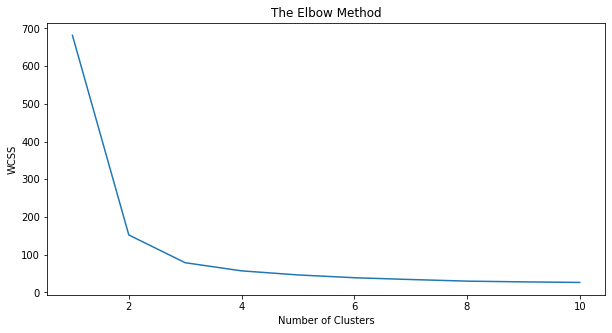

In [ ]:
# Finding the optimum number of clusters for k-means classification
WCSS=[]
x = iris_df.iloc[:, [0, 1, 2, 3]].values
K = range(1,11)
for k in  K:
  km = KMeans(n_clusters = k,init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
  km.fit(x)
  WCSS.append(km.inertia_)
    
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.figure(figsize=(10,5))
plt.plot(K,WCSS)
plt.title("The Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS") # Within cluster sum of squares
plt.show()

In [ ]:
# Applying kmeans to the dataset / Creating the kmeans classifier

km = KMeans(n_clusters= 3,init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = km.fit_predict(x)

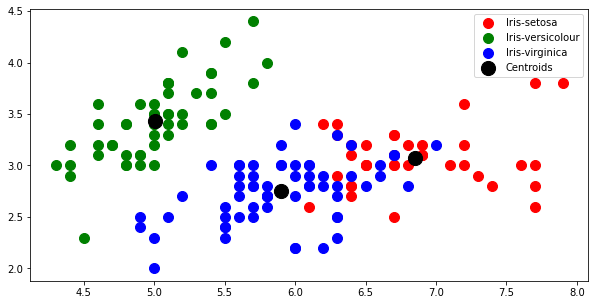

In [ ]:
# Visualising the clusters - On the first two columns
plt.figure(figsize=(10,5))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'green', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'blue', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:,1], 
            s = 200, c = 'black', label = 'Centroids')

plt.legend()